Import the Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import raw data

In [47]:
df = pd.read_csv("raw_sales.csv")

Sample data

In [48]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


check number of rows and columns

In [49]:

print("size of dataset",df.shape)

size of dataset (30394, 6)


Check columns

In [50]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

Datatypes

In [51]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## DATA CLEANING

#### Rename Columns

In [52]:
df.rename(columns=
          {
              "Order ID": "order_id",
    "Product": "product",
    "Quantity Ordered": "quantity_ordered",
    "Price Each": "price_each",
    "Order Date": "order_date",
    "Purchase Address": "purchase_address"
          },inplace = True)

#### Change the datatype

In [53]:
df["order_id"] = pd.to_numeric(df["order_id"], errors="coerce")
df["quantity_ordered"] = pd.to_numeric(df["quantity_ordered"], errors="coerce")
df["price_each"] = pd.to_numeric(df["price_each"], errors="coerce")


In [54]:
print(df["order_id"].head())

0    176558.0
1         NaN
2    176559.0
3    176560.0
4    176560.0
Name: order_id, dtype: float64


In [55]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%m/%d/%y %H:%M", errors="coerce")



#### Drop duplicates

In [56]:
df = df.drop_duplicates()

In [57]:
df.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [58]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


#### Check unique values

In [59]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 30)


Column: order_id
[176558.     nan 176559. ... 248148. 248149. 248150.]
------------------------------
Column: product
['USB-C Charging Cable' nan 'Bose SoundSport Headphones' 'Google Phone'
 'Wired Headphones' 'Macbook Pro Laptop' 'Lightning Charging Cable'
 '27in 4K Gaming Monitor' 'AA Batteries (4-pack)'
 'Apple Airpods Headphones' 'AAA Batteries (4-pack)' 'iPhone'
 'Flatscreen TV' '27in FHD Monitor' '20in Monitor' 'LG Dryer'
 'ThinkPad Laptop' 'Vareebadd Phone' 'LG Washing Machine'
 '34in Ultrawide Monitor' 'Product']
------------------------------
Column: quantity_ordered
[ 2. nan  1.  3.  5.  4.  7.  6.  8.]
------------------------------
Column: price_each
[  11.95     nan   99.99  600.     11.99 1700.     14.95  389.99    3.84
  150.      2.99  700.    300.    149.99  109.99  999.99  400.    379.99]
------------------------------
Column: order_date
<DatetimeArray>
['2019-04-19 08:46:00',                 'NaT', '2019-04-07 22:30:00',
 '2019-04-12 14:38:00', '2019-04-30 09:27:00',

In [60]:
#df[df["product"] == "Product"]
df[df.isin(["product", "purchase_address"]).any(axis=1)]


,order_id,product,quantity_ordered,price_each,order_date,purchase_address


In [61]:
df = df[~df.isin(["product", "purchase_address"]).any(axis=1)]
df = df.dropna(how="all").reset_index(drop=True)
print(df)



       order_id                     product  quantity_ordered  price_each  \
0      176558.0        USB-C Charging Cable               2.0       11.95   
1      176559.0  Bose SoundSport Headphones               1.0       99.99   
2      176560.0                Google Phone               1.0      600.00   
3      176560.0            Wired Headphones               1.0       11.99   
4      176561.0            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
30202  248146.0  Bose SoundSport Headphones               1.0       99.99   
30203  248147.0      AAA Batteries (4-pack)               3.0        2.99   
30204  248148.0       AA Batteries (4-pack)               1.0        3.84   
30205  248149.0        USB-C Charging Cable               1.0       11.95   
30206  248150.0       AA Batteries (4-pack)               1.0        3.84   

               order_date                         purchase_address  
0     

#### count of null values

In [62]:
print(df.isna().sum())


order_id            1
product             0
quantity_ordered    1
price_each          1
order_date          1
purchase_address    0
dtype: int64


In [63]:
df[df.isna().any(axis=1)]


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
516,NaN,Product,NaN,NaN,NaT,Purchase Address


In [64]:
df = df[df["product"] != "Product"].reset_index(drop=True)


In [65]:
print(df[df["product"] == "Product"])
print(df.isna().sum())


Empty DataFrame
Columns: [order_id, product, quantity_ordered, price_each, order_date, purchase_address]
Index: []
order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64


#### verify cleaning

In [66]:
print("Shape after cleaning:", df.shape)
print("Null values:\n", df.isnull().sum())
print(df.head())

Shape after cleaning: (30206, 6)
Null values:
 order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64
   order_id                     product  quantity_ordered  price_each  \
0  176558.0        USB-C Charging Cable               2.0       11.95   
1  176559.0  Bose SoundSport Headphones               1.0       99.99   
2  176560.0                Google Phone               1.0      600.00   
3  176560.0            Wired Headphones               1.0       11.99   
4  176561.0            Wired Headphones               1.0       11.99   

           order_date                      purchase_address  
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001  
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215  
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001

## Data Analysis

In [67]:
#sales revenue column
df["sales"] = df["quantity_ordered"] * df["price_each"]

In [68]:
#total sales revenue
total_sales_revenue = df["sales"].sum()
print("Total sales: $",round(total_sales_revenue,2))

Total sales: $ 5635634.65


In [69]:
#total orders
total_orders = df["order_id"].nunique()
print("Total orders:",total_orders)


Total orders: 29018


In [70]:
#total quantity sold
total_quantity_sold = df["quantity_ordered"].sum()
print("Total quantity sold:",int(total_quantity_sold))

Total quantity sold: 33969


In [71]:
#Average order value
avg_order_value = total_sales_revenue / total_orders
print("Average order value: $",round(avg_order_value,2))

Average order value: $ 194.21


In [72]:
#top 5 best selling products
top_products = df.groupby("product")["quantity_ordered"].sum().sort_values(ascending=False).head(5)
print("Top 5 best selling products:\n",top_products)

Top 5 best selling products:
 product
AAA Batteries (4-pack)      4950.0
AA Batteries (4-pack)       4647.0
Lightning Charging Cable    3803.0
USB-C Charging Cable        3723.0
Wired Headphones            3353.0
Name: quantity_ordered, dtype: float64


In [73]:
#top 5 best selling products by revenue
top_products_rev = df.groupby("product")["sales"].sum().sort_values(ascending=False).head(5)
print("Top 5 best selling products by revenue:\n",top_products_rev)

Top 5 best selling products by revenue:
 product
Macbook Pro Laptop        1280100.00
iPhone                     793100.00
ThinkPad Laptop            666993.33
Google Phone               564600.00
34in Ultrawide Monitor     391769.69
Name: sales, dtype: float64


In [74]:
#sales by month
df["month"] = df["order_date"].dt.month
sales_by_month = df.groupby("month")["sales"].sum()
print("Sales by month:\n",sales_by_month)

Sales by month:
 month
4    3384047.56
5      10559.29
8    2238931.06
9       2096.74
Name: sales, dtype: float64


In [75]:
#peak order hours
df["hour"] = df["order_date"].dt.hour
peak_hours = df.groupby("hour")["order_id"].count()
print("peak order hours:\n", peak_hours) 


peak order hours:
 hour
0      622
1      381
2      217
3      138
4      139
5      240
6      429
7      676
8     1052
9     1392
10    1826
11    1992
12    1997
13    1960
14    1810
15    1693
16    1725
17    1680
18    1979
19    2112
20    2024
21    1682
22    1441
23     999
Name: order_id, dtype: int64


In [76]:
#Extract weekday name
df["Dayofweek"] = df["order_date"].dt.day_name()

In [77]:
# Mark Weekend or Weekday
df["DayType"] = df["Dayofweek"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

In [78]:
# Group by DayType
sales_by_daytype = df.groupby("DayType")["sales"].sum().reset_index()


In [79]:
# Extract weekday name
df["DayOfWeek"] = df["order_date"].dt.day_name()

## Charts/Graphs

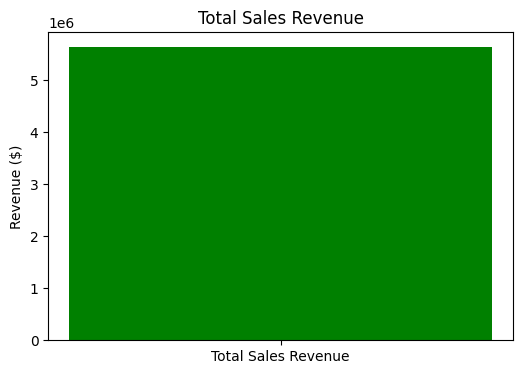

In [80]:
#total sales revenue
plt.figure(figsize=(6,4))
plt.bar(["Total Sales Revenue"],[total_sales_revenue],color = "green")
plt.ylabel("Revenue ($)")
plt.title("Total Sales Revenue")
plt.show()

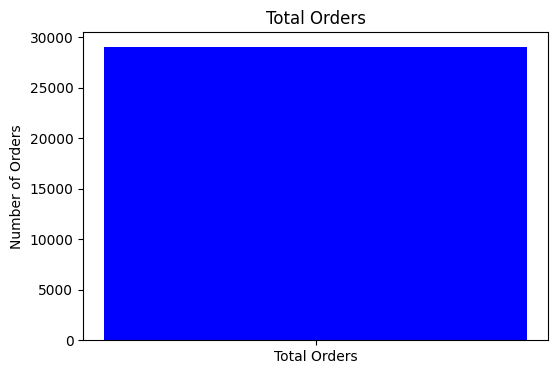

In [81]:
# total orders
plt.figure(figsize=(6,4))
plt.bar(["Total Orders"], [total_orders], color="blue")
plt.ylabel("Number of Orders")
plt.title("Total Orders")
plt.show()


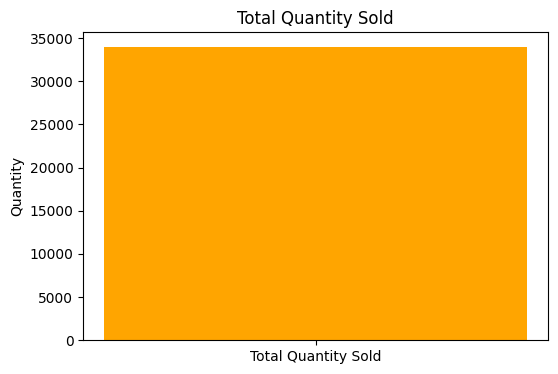

In [82]:
#total quantity sold
plt.figure(figsize=(6,4))
plt.bar(["Total Quantity Sold"], [total_quantity_sold], color="orange")
plt.ylabel("Quantity")
plt.title("Total Quantity Sold")
plt.show()


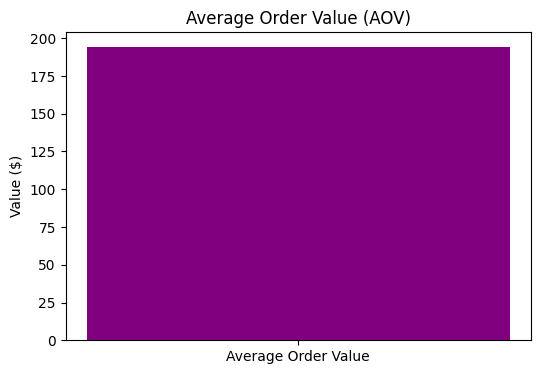

In [83]:
#average order value
plt.figure(figsize=(6,4))
plt.bar(["Average Order Value"], [avg_order_value], color="purple")
plt.ylabel("Value ($)")
plt.title("Average Order Value (AOV)")
plt.show()


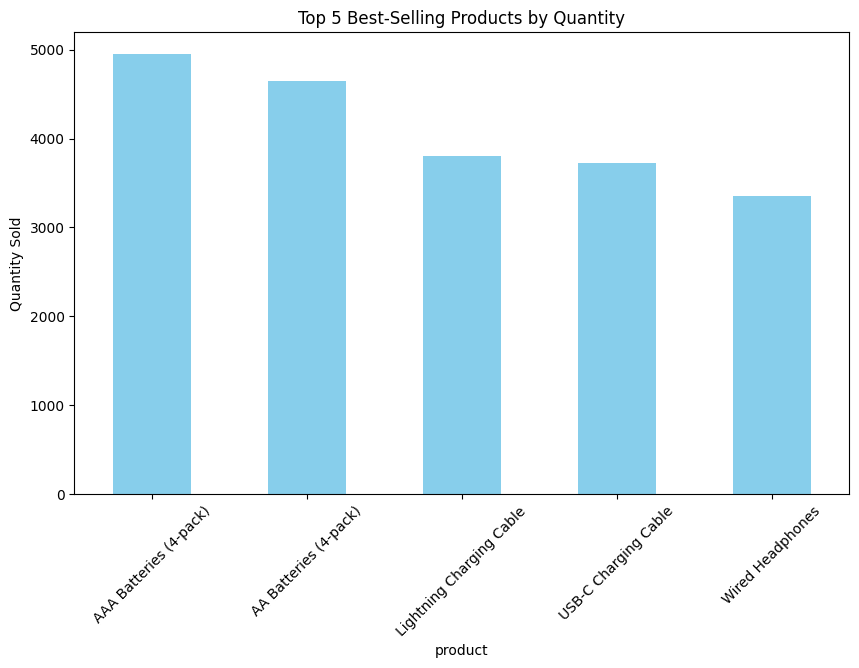

In [84]:
#Top 5 best selling products by quantity

plt.figure(figsize=(10,6))
top_products.plot(kind="bar", color="skyblue")
plt.ylabel("Quantity Sold")
plt.title("Top 5 Best-Selling Products by Quantity")
plt.xticks(rotation=45)
plt.show()


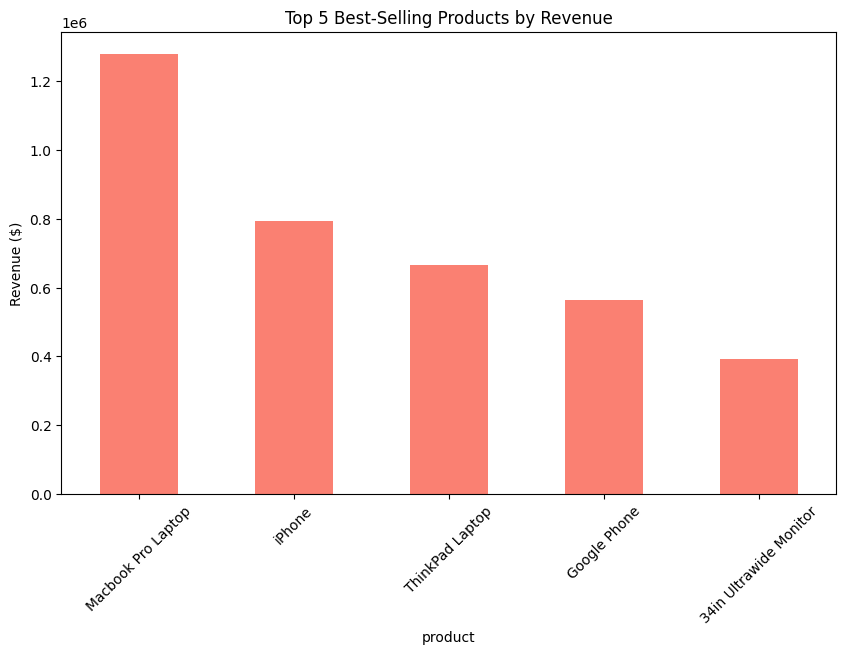

In [85]:
# Top 5 best selling products by Revenue

plt.figure(figsize=(10,6))
top_products_rev.plot(kind="bar", color="salmon")
plt.ylabel("Revenue ($)")
plt.title("Top 5 Best-Selling Products by Revenue")
plt.xticks(rotation=45)
plt.show()



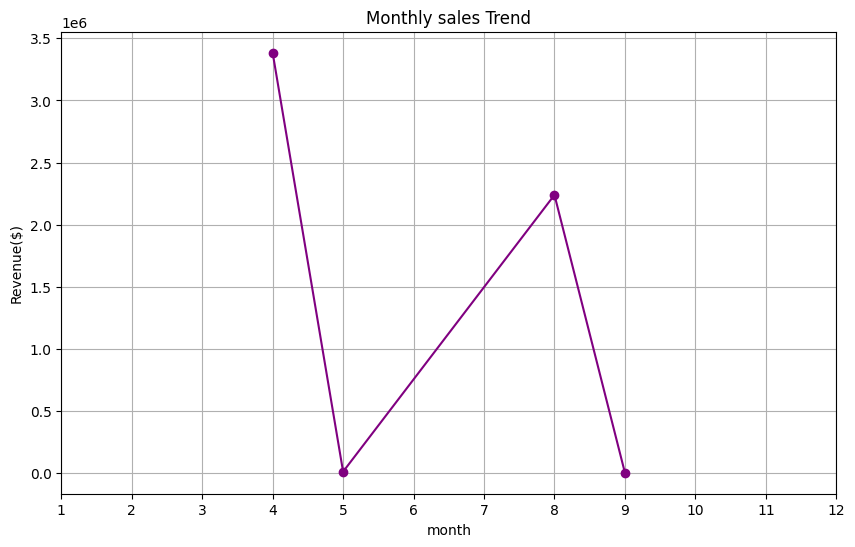

In [86]:
# sales by month
plt.figure(figsize=(10,6))
sales_by_month.plot(kind="line",marker = "o",color="purple")
plt.ylabel("Revenue($)")
plt.title("Monthly sales Trend")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

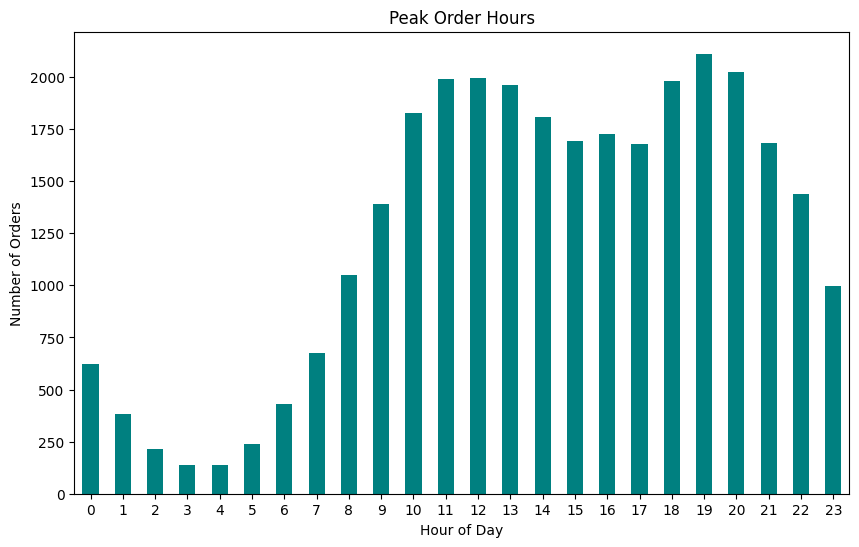

In [87]:
#Peak order hours
plt.figure(figsize=(10,6))
peak_hours.plot(kind="bar",color ="teal")
plt.ylabel("Number of Orders")
plt.xlabel("Hour of Day")
plt.title("Peak Order Hours")
plt.xticks(rotation=0)
plt.show()

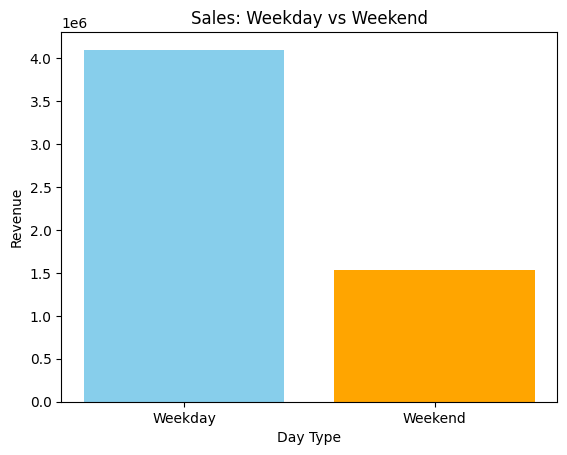

In [88]:
#sales by daytype
plt.bar(sales_by_daytype["DayType"], sales_by_daytype["sales"], color=["skyblue", "orange"])
plt.title("Sales: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Revenue")
plt.show()

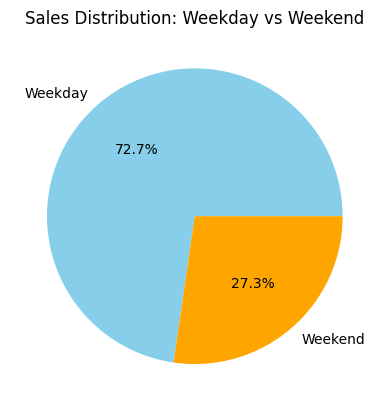

In [89]:
#sales by daytype
plt.pie(sales_by_daytype["sales"], labels=sales_by_daytype["DayType"], autopct="%1.1f%%", colors=["skyblue", "orange"])
plt.title("Sales Distribution: Weekday vs Weekend")
plt.show()


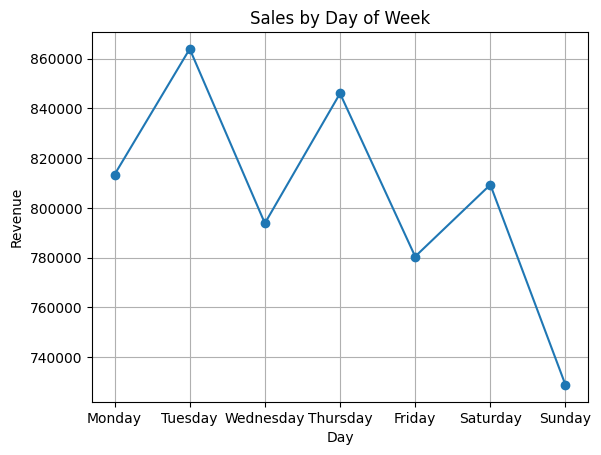

In [90]:
#sales by day of week
sales_by_weekday = df.groupby("DayOfWeek")["sales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

sales_by_weekday.plot(kind="line", marker="o")
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()
